######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3b235">Image processing
<font color=darkblue>
    

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#54c335">Our Core Python Libraries
<font color=darkblue>   

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#358ac3">Load one sample image
<font color=darkblue>   

In [2]:
img = cv2.imread('/home/jayanthikishore/Downloads/ML_classwork/Week5_srrt/image1.png')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c335ae">Prepare kernal for analysis
<font color=darkblue>   

In [3]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c3355b">Original and Average plot
<font color=darkblue>  

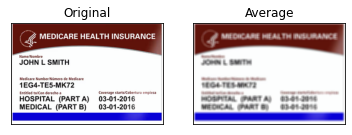

In [36]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst),plt.title('Average')
plt.xticks([]), plt.yticks([])
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c377">Original and Blurred Image
<font color=darkblue>  

In [5]:
blur = cv2.blur(img,(5,5))

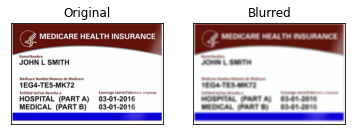

In [6]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c377">Original and Gaussian Blurred Image
<font color=darkblue>  

In [7]:
gauss = cv2.GaussianBlur(img,(5,5),0)

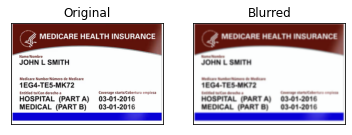

In [8]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gauss),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#59c335">Original and Bilateral Image
<font color=darkblue>  

In [9]:
bilat = cv2.bilateralFilter(img,9,75,75)

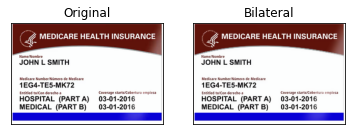

In [10]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(bilat),plt.title('Bilateral')
plt.xticks([]), plt.yticks([])
plt.show()

_____
_____

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c3a935">Load sample Image
<font color=darkblue>  

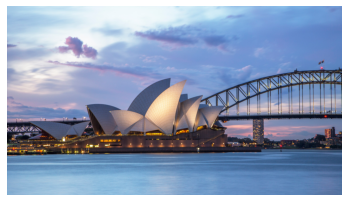

In [39]:
imgloc= '/home/jayanthikishore/Downloads/ML_classwork/Week5_srrt/Sydney_Opera_House.jpg'
opera = plt.imread(imgloc)
plt.axis('off')
plt.imshow(opera);

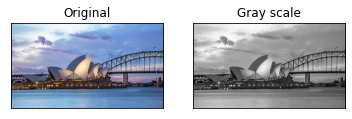

In [40]:
def gray(im):
    lum = np.zeros((1, 1, 3))
    lum[0, 0, :] = [0.2126, 0.7152, 0.0722]
    return np.uint8(np.round(np.sum(lum*im, axis = 2)))
operag = gray(opera)
plt.subplot(121),plt.imshow(opera),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(operag, cmap='gray'),plt.title('Gray scale')
plt.xticks([]), plt.yticks([])
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c3a935">Image intensity histograms
<font color=darkblue>  

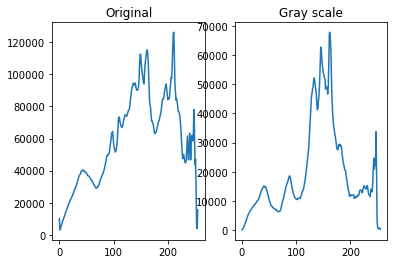

In [30]:
#Histograms
def hist(im):
    h = np.zeros((256))
    for p in im.ravel():
        h[p] += 1
    return h

histo_opera = hist(opera)
histo_operag = hist(operag)

plt.subplot(121),plt.plot(histo_opera),plt.title('Original')

plt.subplot(122), plt.plot(histo_operag),plt.title('Gray scale')
# plt.xticks([]), plt.yticks([])
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c3a935">Image Histogram and equalizers
<font color=darkblue>  

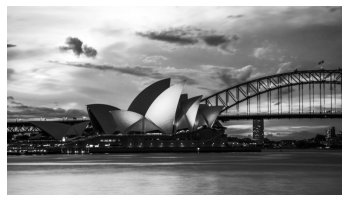

In [33]:
#Histogram equalizer
def densite(h):
    s = 0
    res = np.zeros_like(h)
    for i in range(len(h)):
        res[i] = s
        s += h[i]
    return res/s


def egaliser(im):
    d_im = densite(hist(im))
    im_eq = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            im_eq[i,j] = np.round(d_im[im[i, j]] * 255)
    return im_eq

opera_eg = egaliser(operag)
plt.axis('off')
plt.imshow(opera_eg, cmap = "gray");


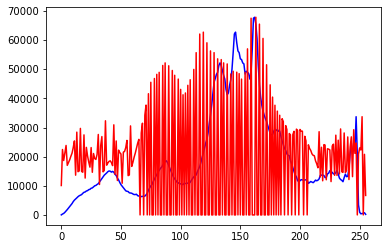

In [35]:
plt.plot(histo_operag, color = "blue")
plt.plot(hist(opera_eg), color = "red");
